In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_colwidth", 200)

### Loading in data


In [3]:
raw_df = pd.read_csv('data/card_transdata.csv')
raw_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Shows that there are no null rows that we need to deal with. 
raw_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Data imbalance check

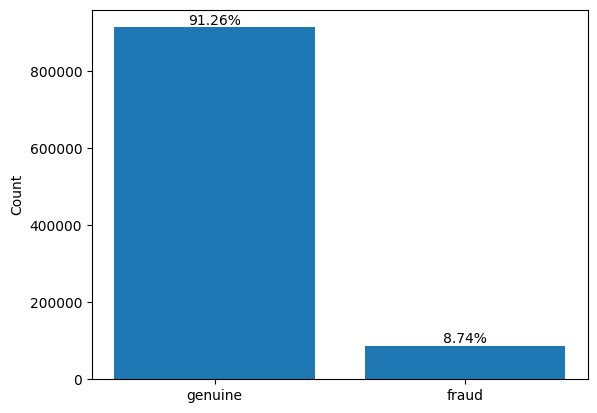

In [5]:
labels = ["genuine", "fraud"]
counts = raw_df["fraud"].value_counts().to_list()
proportion = counts / np.sum(counts) * 100

bar = plt.bar(labels, counts)
plt.ylabel("Count")

# add text inside each bar
for idx, rect in enumerate(bar):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{proportion[idx]:.2f}%', ha='center', va='bottom')

# display the chart
plt.show()

Because fraud is generally less common than real transactions, there's undersampling that needs to be dealt with. Training a dummy classifer will give us a accuracy of 91.26% so our goal is to create a classifier that is at least better than a dummy classifier.

Will use the following:
F1 Score - because we care both about accuracy and precision
SMOTE - As a method of oversampling the minority class
Normalization - Normalize numeric predictors.
PCA - On the numeric predictors to help with visualization?
Linear SVM -
Decision Tree -
Random Forest -
KNN Classification - Possible implement by ourselves?
Logistic Regression -
Neural Network -
Ensemble meth

In [6]:
# We use stratified random sampling to maintain an equal proportion of genuine and fraud observations in both our training and test data.
train_df, test_df = train_test_split(raw_df, test_size=0.20, random_state=123, stratify=raw_df["fraud"])
X_train, y_train = (
    train_df.drop(columns=["fraud"]),
    train_df["fraud"],
)
X_test, y_test = (
    test_df.drop(columns=["fraud"]),
    test_df["fraud"],
)

In [17]:

pipe = make_pipeline(
    SimpleImputer(),
    SMOTE(),
    KNeighborsClassifier()
)
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

In [18]:
f1_score(y_test, preds)

0.8810045336457644